/Users/kathelopez/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


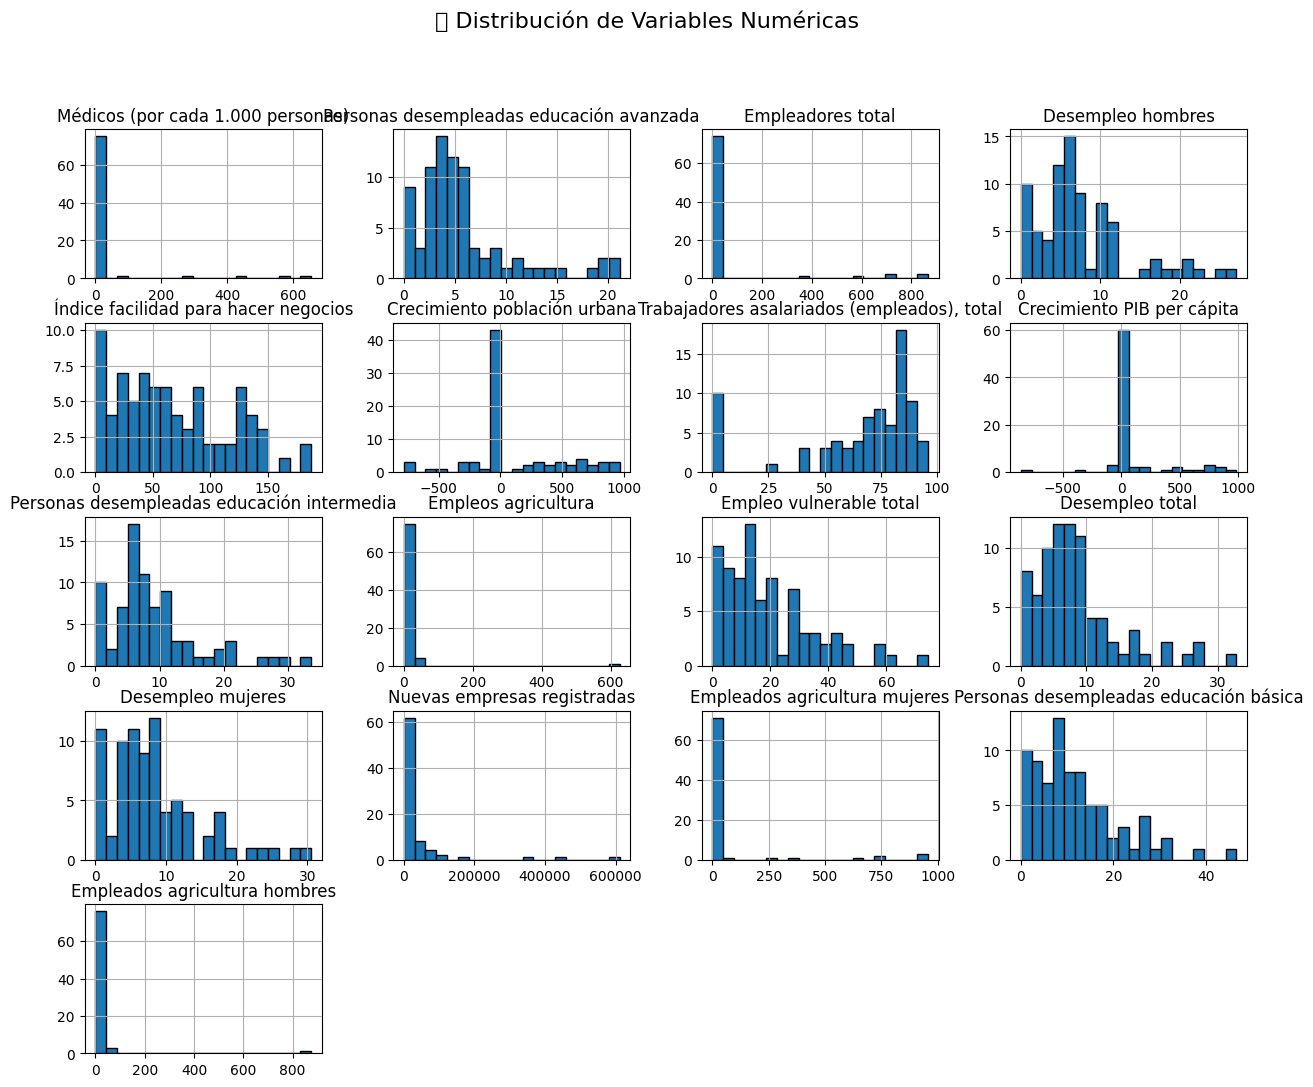

/Users/kathelopez/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


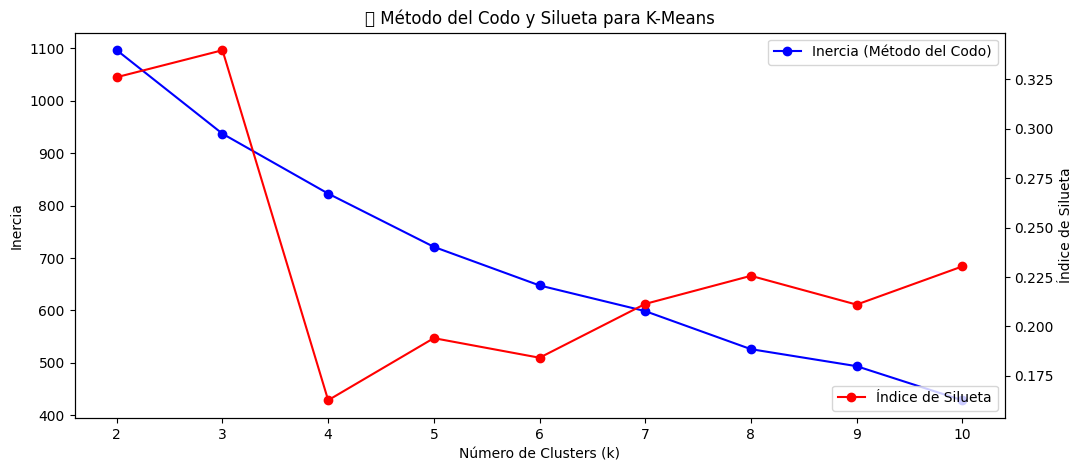


📌 Preguntas para el usuario:
                                            Pregunta  \
0  ¿Qué tan importante es para ti la calidad del ...   
1  ¿Prefieres un país con alta empleabilidad y ba...   
2  ¿Es importante que el país tenga un crecimient...   
3  ¿Prefieres un país con alta facilidad para hac...   
4  ¿Te interesa la estabilidad laboral en un país...   
5  ¿Es relevante que el país tenga alta urbanizac...   
6  ¿Consideras clave la cantidad de empresas regi...   
7  ¿Prefieres una economía basada en tecnología y...   
8  ¿Te gustaría un país con oportunidades tanto p...   
9  ¿Es importante para ti la diversidad de empleo...   

                                            Opciones  
0          Muy importante, Moderado, No es relevante  
1  Sí, prefiero países con bajo desempleo, No me ...  
2  Sí, quiero un país con PIB en crecimiento, No ...  
3  Sí, prefiero un país con facilidad para hacer ...  
4  Sí, la estabilidad laboral es clave, No es pri...  
5  Sí, prefiero un país

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 📌 2. Cargar y preparar los datos
file_path = "data_2/country_resumido.csv"  # Ajusta la ruta del archivo
df = pd.read_csv(file_path, delimiter=";")  # Cargar CSV con separador ";"

# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64']).columns
df_numeric = df[numeric_cols]

# 📌 3. Visualizar la distribución de variables numéricas
df_numeric.hist(figsize=(15, 12), bins=20, edgecolor="black")
plt.suptitle("📊 Distribución de Variables Numéricas", fontsize=16)
plt.show()

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# 📌 4. Determinar el número óptimo de clusters (Método del Codo y Silueta)
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Evaluamos de 2 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# 📌 5. Graficar el método del codo y el índice de silueta
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.plot(K_range, inertia, 'bo-', label='Inercia (Método del Codo)')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inercia')
ax1.set_title('📈 Método del Codo y Silueta para K-Means')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.plot(K_range, silhouette_scores, 'ro-', label='Índice de Silueta')
ax2.set_ylabel('Índice de Silueta')
ax2.legend(loc='lower right')

plt.show()

# 📌 6. Aplicar K-Means con el mejor número de clusters (basado en el gráfico)
best_k = 3  # Puedes cambiarlo según el gráfico del codo
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# 📌 7. Definir preguntas para clasificar usuarios
preguntas = [
    "¿Qué tan importante es para ti la calidad del sistema de salud?",
    "¿Prefieres un país con alta empleabilidad y bajo desempleo?",
    "¿Es importante que el país tenga un crecimiento económico positivo?",
    "¿Prefieres un país con alta facilidad para hacer negocios?",
    "¿Te interesa la estabilidad laboral en un país con más asalariados?",
    "¿Es relevante que el país tenga alta urbanización e infraestructura?",
    "¿Consideras clave la cantidad de empresas registradas en un país?",
    "¿Prefieres una economía basada en tecnología y servicios?",
    "¿Te gustaría un país con oportunidades tanto para empleadores como empleados?",
    "¿Es importante para ti la diversidad de empleo en distintos sectores?",
]

opciones = [
    "Muy importante, Moderado, No es relevante",
    "Sí, prefiero países con bajo desempleo, No me afecta tanto",
    "Sí, quiero un país con PIB en crecimiento, No es mi prioridad",
    "Sí, prefiero un país con facilidad para hacer negocios, No es tan relevante",
    "Sí, la estabilidad laboral es clave, No es prioritario",
    "Sí, prefiero un país con alto crecimiento urbano, No es importante",
    "Sí, un alto número de empresas registradas es clave, No lo considero necesario",
    "Sí, prefiero economías tecnológicas y de servicios, No me importa si es agrícola",
    "Sí, me gustaría un país que favorezca empleadores y empleados, No es necesario",
    "Sí, quiero variedad de oportunidades laborales, No me importa mucho el sector",
]

df_preguntas = pd.DataFrame({"Pregunta": preguntas, "Opciones": opciones})
print("\n📌 Preguntas para el usuario:")
print(df_preguntas)

# 📌 8. Función para clasificar un usuario en un cluster
def clasificar_usuario(respuestas):
    """
    Clasifica al usuario en un cluster basado en sus respuestas.

    Parámetro:
    - respuestas: diccionario con claves como las variables y valores numéricos.

    Retorna:
    - Cluster más cercano según las respuestas.
    """
    # Completar respuestas faltantes con la media de cada variable
    respuestas_completas = df_numeric.mean().to_dict()
    respuestas_completas.update(respuestas)  # Reemplazar con valores del usuario

    # Convertir respuestas en array con el orden correcto
    usuario_vector = np.array([respuestas_completas[col] for col in numeric_cols]).reshape(1, -1)

    # Normalizar las respuestas del usuario
    usuario_vector_scaled = scaler.transform(usuario_vector)

    # Predecir el cluster del usuario
    return kmeans.predict(usuario_vector_scaled)[0]

# 📌 9. Simulación de respuestas de usuario
respuestas_usuario = {
    "Médicos (por cada 1.000 personas)": 8,  # Alta calidad de salud
    "Personas desempleadas educación avanzada": 2,  # Bajo desempleo
    "Índice facilidad para hacer negocios": 90,  # País favorable para negocios
    "Crecimiento PIB per cápita": 3.5,  # Crecimiento económico positivo
    "Empleos agricultura": 5,  # Baja dependencia del sector agrícola
}

# Clasificar usuario
cluster_usuario = clasificar_usuario(respuestas_usuario)
print(f"\n📌 El usuario pertenece al Cluster {cluster_usuario}")

# 📌 10. Recomendar los 5 mejores países dentro del cluster asignado
pais_cluster = df[df["Cluster"] == cluster_usuario]

# Ordenar por facilidad de negocios (sin mostrar PIB per cápita)
pais_recomendados = pais_cluster.sort_values(
    by=["Índice facilidad para hacer negocios"],
    ascending=True
).head(5)

# 📌 11. Mostrar resultados detallados
print("\n📌 Respuestas exactas del usuario:")
respuestas_detalladas = pd.DataFrame({
    "Variable": respuestas_usuario.keys(),
    "Valor Ingresado": respuestas_usuario.values(),
})
print(respuestas_detalladas)

print("\n📌 Países recomendados para el usuario:")
print(pais_recomendados[["Country Name", "Continent", "Índice facilidad para hacer negocios"]])

12. Guardar el Modelo Entrenado

Después de entrenar el modelo KMeans, es importante guardar el modelo y el escalador (StandardScaler) para que se pueda reutilizar sin tener que volver a entrenarlo cada vez.

¿Qué hace esto?
- Guarda el modelo KMeans entrenado en un archivo modelo_kmeans.pkl.
- Guarda el StandardScaler en scaler.pkl para que se pueda normalizar nuevos datos de la misma forma.

In [84]:
#Código para Guardar el Modelo Entrenado:

import joblib  # Para guardar modelos en archivos

# Guardar el modelo KMeans entrenado
joblib.dump(kmeans, "modelo_kmeans.pkl")

# Guardar el StandardScaler para futuras normalizaciones
joblib.dump(scaler, "scaler.pkl")

print("✔ Modelo y escalador guardados correctamente.")

✔ Modelo y escalador guardados correctamente.


13. Visualizar los Clusters con PCA

Para asegurarnos de que el clustering tiene sentido, podemos graficar los clusters en 2D usando PCA.

¿Qué hace esto?
- Reduce los datos a dos dimensiones con PCA para visualizar los clusters.
- Dibuja los clusters con diferentes colores para ver si están bien separados.

💡 Si los clusters están bien separados, el modelo está funcionando bien.
💡 Si los colores están mezclados, podríamos probar otro número de clusters (k).

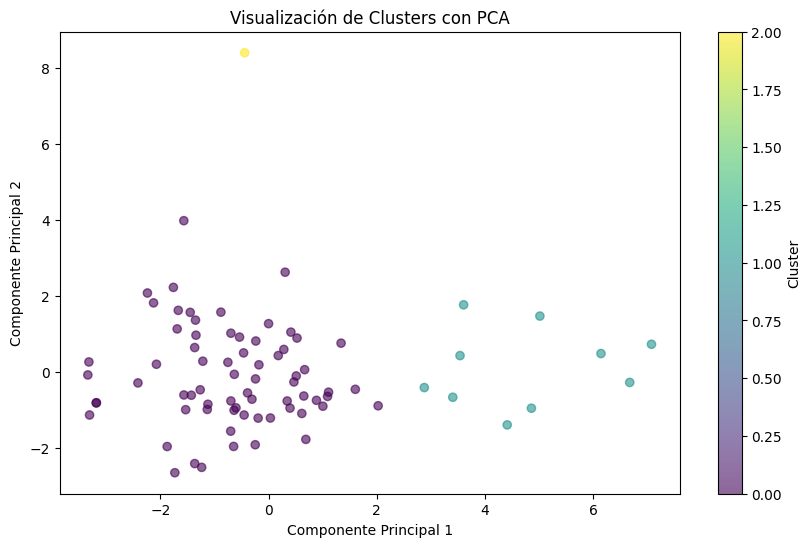

In [85]:
# Código para Visualizar los Clusters:

from sklearn.decomposition import PCA

# Reducir la dimensionalidad de los datos a 2D con PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Graficar los clusters en 2D
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de Clusters con PCA")
plt.colorbar(label="Cluster")
plt.show()

14. Cargar el Modelo Entrenado para Usarlo en el Futuro

Después de guardar el modelo, podemos recargarlo sin necesidad de volver a entrenarlo.

¿Qué hace esto?
- Carga el modelo KMeans y el StandardScaler.
- Clasifica un nuevo usuario sin necesidad de reentrenar el modelo.
- Devuelve el cluster al que pertenece el nuevo usuario.

💡 Esto es útil para integrar el modelo en una aplicación web.

In [86]:
#Código para Cargar el Modelo y Clasificar Nuevos Usuarios:

# Cargar el modelo entrenado y el escalador
import joblib
import numpy as np

kmeans = joblib.load("modelo_kmeans.pkl")
scaler = joblib.load("scaler.pkl")

# Crear un usuario nuevo con TODAS las características del dataset
nuevo_usuario = {
    "Médicos (por cada 1.000 personas)": 7,
    "Personas desempleadas educación avanzada": 3,
    "Índice facilidad para hacer negocios": 80,
    "Crecimiento PIB per cápita": 4.0,
    "Empleos agricultura": 10,
}

# Calcular la media de todas las variables numéricas y guardarlas
df_numeric_mean = df_numeric.mean().to_dict()
joblib.dump(df_numeric_mean, "df_numeric_mean.pkl")

# Asegurar que TODAS las variables estén presentes (rellenar con la media si faltan)
df_numeric_mean = joblib.load("df_numeric_mean.pkl")  # Guardamos previamente las medias

# Crear un diccionario con todas las variables y completar con la media si falta alguna
usuario_completo = df_numeric_mean.copy()
usuario_completo.update(nuevo_usuario)

# Convertir en un array y normalizarlo
usuario_vector = np.array([usuario_completo[col] for col in df_numeric_mean.keys()]).reshape(1, -1)
usuario_vector_scaled = scaler.transform(usuario_vector)

# Predecir el cluster del usuario
cluster_predicho = kmeans.predict(usuario_vector_scaled)[0]

print(f"📌 El usuario pertenece al Cluster {cluster_predicho}")

📌 El usuario pertenece al Cluster 0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


15. Agregar un Reporte Final del Modelo

Para asegurarnos de que el modelo es confiable, podemos generar un resumen con las características de cada cluster.

¿Qué hace esto?
- Muestra cuántos países hay en cada cluster.
- Calcula el promedio de cada variable en cada cluster.

💡 Esto ayuda a interpretar los clusters y entender qué representa cada grupo.

In [87]:
#Código para Ver la Distribución de Clusters en el Dataset:

# 📌 1. Contar cuántos países hay en cada cluster
print("\n📌 Distribución de países por Cluster:")
print(df["Cluster"].value_counts())

# 📌 2. Seleccionar solo las columnas numéricas antes de calcular la media
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  # Solo variables numéricas

# 📌 3. Calcular la media de cada cluster solo con columnas numéricas
cluster_summary = df.groupby("Cluster")[numeric_cols].mean()

print("\n📌 Características promedio de cada Cluster:")
print(cluster_summary)


📌 Distribución de países por Cluster:
Cluster
0    69
1    10
2     1
Name: count, dtype: int64

📌 Características promedio de cada Cluster:
         Médicos (por cada 1.000 personas)  \
Cluster                                      
0                                22.682029   
1                                67.932300   
2                                 3.973000   

         Personas desempleadas educación avanzada  Empleadores total  \
Cluster                                                                
0                                        4.234754          62.278319   
1                                       16.225900           4.170800   
2                                        3.268000           3.594000   

         Desempleo hombres  Índice facilidad para hacer negocios  \
Cluster                                                            
0                 5.978014                             67.086957   
1                18.181300                             59.4000

In [88]:
print("\n📌 Resumen del Análisis:")
print(f"✔ El usuario pertenece al Cluster {cluster_usuario}")
print(f"✔ Número óptimo de clusters detectado: {best_k}")
print(f"✔ Se han recomendado {len(pais_recomendados)} países según sus preferencias.")

# Mostrar tabla con las recomendaciones
import pandas as pd
pd.set_option("display.max_columns", None)  # Para ver todas las columnas
print("\n🌎 Países Recomendados:")
print(pais_recomendados[["Country Name", "Continent", "Índice facilidad para hacer negocios"]])


📌 Resumen del Análisis:
✔ El usuario pertenece al Cluster 0
✔ Número óptimo de clusters detectado: 3
✔ Se han recomendado 5 países según sus preferencias.

🌎 Países Recomendados:
     Country Name      Continent  Índice facilidad para hacer negocios
46  Liechtenstein         Europe                                   0.0
21        Curacao  North America                                   0.0
53         Mónaco         Europe                                   0.0
20           Cuba  North America                                   0.0
4           Aruba  North America                                   0.0


16. Convertir el Modelo en una Aplicación Web

Para permitir que los usuarios ingresen sus respuestas y obtengan recomendaciones de países, hacer una aplicación web usando xxxxx.

¿Cómo ejecutarlo?
1️. xxxxxxxxxxx.
2️. Ejecuta el siguiente comando en la terminal:



Esto abrirá una página web donde los usuarios pueden interactuar con el modelo.

In [89]:
# codigo página web

## Pruebas con best_k = 4

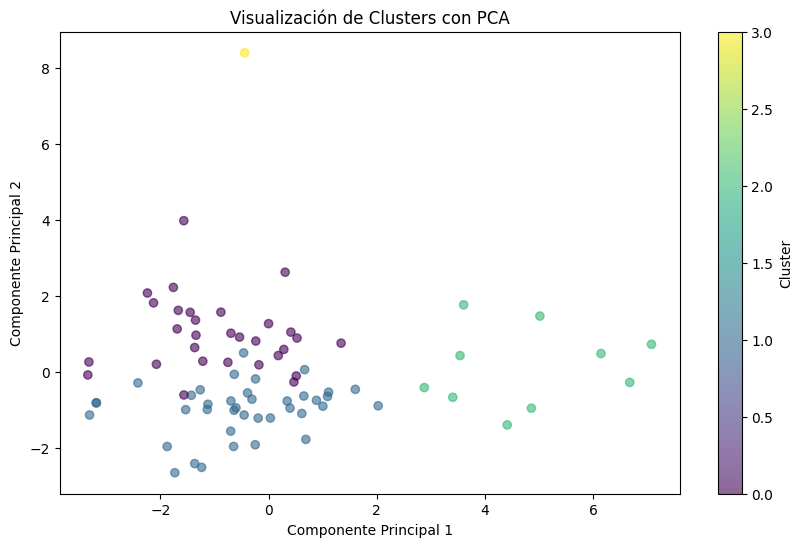

In [90]:
best_k = 4  # O prueba con 5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Reducir la dimensionalidad a 2D con PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Graficar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de Clusters con PCA")
plt.colorbar(label="Cluster")
plt.show()

In [91]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
df["Cluster_DBSCAN"] = dbscan.fit_predict(df_scaled)

In [92]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3)
df["Cluster_Agglo"] = agglo.fit_predict(df_scaled)

In [93]:
# Ver la importancia de cada variable con PCA
pca = PCA(n_components=5)
pca.fit(df_scaled)
print("Importancia de cada variable en los componentes principales:")
print(pd.DataFrame(pca.components_, columns=numeric_cols).T)

Importancia de cada variable en los componentes principales:
                                                    0         1         2  \
Médicos (por cada 1.000 personas)            0.072898  0.169594 -0.127179   
Personas desempleadas educación avanzada     0.411263  0.007409 -0.124986   
Empleadores total                           -0.047815  0.049406  0.168899   
Desempleo hombres                            0.379344  0.037105  0.159435   
Índice facilidad para hacer negocios        -0.024613  0.433558 -0.128159   
Crecimiento población urbana                -0.077986 -0.200942  0.136703   
Trabajadores asalariados (empleados), total  0.110335 -0.126311  0.451879   
Crecimiento PIB per cápita                  -0.041180 -0.104275  0.308943   
Personas desempleadas educación intermedia   0.433966 -0.004336 -0.052881   
Empleos agricultura                         -0.007234  0.454228  0.382653   
Empleo vulnerable total                      0.017706  0.438404 -0.110764   
Desempleo total

In [94]:
# Multiplicar algunas variables por un peso mayor
pesos = {
    "Índice facilidad para hacer negocios": 2,  # Doble importancia
    "Médicos (por cada 1.000 personas)": 1.5,   # 50% más importante
}

# Aplicar los pesos a las respuestas del usuario
respuestas_ponderadas = {key: val * pesos.get(key, 1) for key, val in respuestas_usuario.items()}
cluster_usuario = clasificar_usuario(respuestas_ponderadas)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
